<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/DenseNet121(public_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Oct 16 08:29:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -uq "/content/drive/MyDrive/DACON_CropsAreSick/sicks.zip"

In [4]:
import pandas as pd
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [5]:
!mkdir train_imgs/0
!mkdir train_imgs/1
!mkdir train_imgs/2
!mkdir train_imgs/3
!mkdir train_imgs/4
!mkdir train_imgs/5
!mkdir train_imgs/6

In [6]:
list_0, list_1, list_2, list_3, list_4, list_5, list_6 = [],[],[],[],[],[],[]
for j in range(7):
  for i in range(len(train)):
    if train['disease_code'][i] == 0: 
      list_0.append(train['img_path'][i][11:])
    elif train['disease_code'][i] == 1: 
      list_1.append(train['img_path'][i][11:])
    elif train['disease_code'][i] == 2: 
      list_2.append(train['img_path'][i][11:])
    elif train['disease_code'][i] == 3: 
      list_3.append(train['img_path'][i][11:])
    elif train['disease_code'][i] == 4: 
      list_4.append(train['img_path'][i][11:])
    elif train['disease_code'][i] == 5: 
      list_5.append(train['img_path'][i][11:])
    elif train['disease_code'][i] == 6: 
      list_6.append(train['img_path'][i][11:])

# print(list_0)

In [12]:
import shutil

src = './train_imgs/'
dir_0 = './train_imgs/0/'

for a in range(len(list_0)):
  shutil.move(src + list_0[a], dir_0 + list_0[a])

FileNotFoundError: ignored

In [14]:
src = '/content/train_imgs/' 
dir_1 = '/content/train_imgs/1/'
for a in range(len(list_1)):
  shutil.move(src + list_1[a], dir_1 + list_1[a])

FileNotFoundError: ignored

In [16]:
src = '/content/train_imgs/' 
dir_2 = '/content/train_imgs/2/'
for a in range(len(list_2)):
  shutil.move(src + list_2[a], dir_2 + list_2[a])

FileNotFoundError: ignored

In [21]:
src = '/content/train_imgs/' 
dir_3 = '/content/train_imgs/3/'
for a in range(len(list_3)):
  shutil.move(src + list_3[a], dir_3 + list_3[a])

FileNotFoundError: ignored

In [20]:
src = '/content/train_imgs/' 
dir_4 = '/content/train_imgs/4/'
for a in range(len(list_4)):
  shutil.move(src + list_4[a], dir_4 + list_4[a])

FileNotFoundError: ignored

In [19]:
src = '/content/train_imgs/' 
dir_5 = '/content/train_imgs/5/'
for a in range(len(list_5)):
  shutil.move(src + list_5[a], dir_5 + list_5[a])

FileNotFoundError: ignored

In [18]:
src = '/content/train_imgs/' 
dir_6 = '/content/train_imgs/6/'
for a in range(len(list_6)):
  shutil.move(src + list_6[a], dir_6 + list_6[a])

FileNotFoundError: ignored

In [22]:
model_save = 'DenseNet121_1'
Target_model = 'DenseNet121_model'
Target_predict = 'DenseNet121_predict'
Target_acc = 'DenseNet121_acc'
Target_val = 'DenseNet121_val'

In [32]:
import tensorflow as tf
Target_model =  tf.keras.applications.DenseNet121(weights=None, include_top=True, input_shape=(256, 256, 3), classes=8)

In [34]:
Target_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1./255, 
    validation_split = 0.075,
    rotation_range = 15,
    width_shift_range = 0.00,
    height_shift_range = 0.05 )

batch_size = 8
train_generator = datagen.flow_from_directory('./train_imgs', target_size=(256,256), batch_size = batch_size, color_mode='rgb', class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory('./train_imgs', target_size=(256,256), batch_size = batch_size, color_mode='rgb', class_mode='categorical', subset='validation')

Found 237 images belonging to 8 classes.
Found 15 images belonging to 8 classes.


In [36]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'/content/drive/MyDrive/DACON_CropsAreSick/checkpoint/'+ model_save +'.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [37]:
Target_model.fit_generator(train_generator, epochs = 5, validation_data=val_generator, callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
30/30 [==============================] - 33s 741ms/step - loss: 1.7298 - accuracy: 0.3629 - val_loss: 19.9001 - val_accuracy: 0.0667

Epoch 00001: val_accuracy improved from -inf to 0.06667, saving model to /content/drive/MyDrive/DACON_CropsAreSick/checkpoint/DenseNet121_1.h5
Epoch 2/5
30/30 [==============================] - 20s 667ms/step - loss: 1.2632 - accuracy: 0.5190 - val_loss: 3.5048 - val_accuracy: 0.2000

Epoch 00002: val_accuracy improved from 0.06667 to 0.20000, saving model to /content/drive/MyDrive/DACON_CropsAreSick/checkpoint/DenseNet121_1.h5
Epoch 3/5
30/30 [==============================] - 20s 667ms/step - loss: 1.1117 - accuracy: 0.5865 - val_loss: 3.3575 - val_accuracy: 0.2000

Epoch 00003: val_accuracy did not improve from 0.20000
Epoch 4/5
30/30 [==============================] - 20s 651ms/step - loss: 0.9278 - accuracy: 0.6540 - val_loss: 4.8420 - val_accuracy: 0.2000

Epoch 00004: val_accuracy did not improve from 0.20000
Epoch 5/5
30/30 [===========

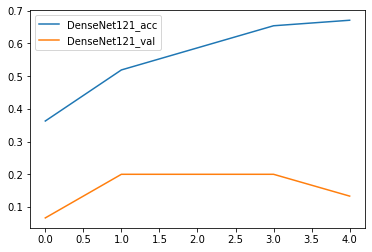

In [38]:
import matplotlib.pyplot as plt

plt.plot(Target_model.history.history["accuracy"], label = Target_acc)
plt.plot(Target_model.history.history["val_accuracy"], label = Target_val)

plt.legend()
plt.show()

In [39]:
Target_model = tf.keras.models.load_model('/content/drive/MyDrive/DACON_CropsAreSick/checkpoint/'+ model_save +'.h5', compile=False)

In [43]:
!mkdir test_imgs/none
!mv test_imgs/*.jpg test_imgs/none

mkdir: cannot create directory ‘test_imgs/none’: File exists


In [44]:
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory('./test_imgs', target_size=(256,256), color_mode='rgb', class_mode='categorical', shuffle=False)

Found 4754 images belonging to 2 classes.


In [45]:
Target_predict = Target_model.predict_generator(test_generator).argmax(axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [46]:
submission = pd.read_csv('./sample_submission.csv')

In [48]:
print(Target_predict)

[2 2 2 ... 1 2 2]


In [ ]:
submission["model_predict"] = Target_predict

In [52]:
from collections import Counter

for i in range(len(submission)) :
    predicts = submission.loc[i, ['model_predict'][4750:]]
    submission.at[i, "disease_code"] = Counter(predicts).most_common(n=1)[0][0]

IndexError: ignored

In [ ]:
submission = submission[['uid', 'disease_code']]

In [ ]:
from google.colab import files

submission.to_csv('/content/drive/MyDrive/DACON_CropsAreSick/submission/'+ model_save +'.csv', index=False)
files.download('/content/drive/MyDrive/DACON_CropsAreSick/submission/'+ model_save +'.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>